# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mainpath = "./data/" #Ruta de archivos 
filename = "bank.csv" #https://archive.ics.uci.edu/ml/datasets/bank+marketing
data = pd.read_csv(mainpath + "/" + filename,sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data['y'] = pd.factorize(data["y"])[0]
grupo=data.groupby(["y"])
grupo.count().iloc[0:2,0:1]

,age
y,
0,3668
1,451


In [6]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


# Variables categóricas

In [9]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [10]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate","Unknown", data["education"])
data["education"] = np.where(data["education"]=="unknown","Unknown", data["education"])

In [11]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown'], dtype=object)

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()
#data.groupby("education").count()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.821429,266.559524,2.547619,940.053571,0.261905,-0.091071,93.628905,-39.439286,3.394839,5150.813690,0.154762


In [14]:
woe_1=data.groupby(['education'])["y"].agg([('Total','count'),('Buenos','sum')]).reset_index()
woe_1

,education,Total,Buenos
0,Basic,1231,98
1,High School,921,97
2,Professional Course,535,65
3,University Degree,1264,165
4,Unknown,168,26


In [15]:
woe_1['Malos']=woe_1.Total-woe_1.Buenos
woe_1

,education,Total,Buenos,Malos
0,Basic,1231,98,1133
1,High School,921,97,824
2,Professional Course,535,65,470
3,University Degree,1264,165,1099
4,Unknown,168,26,142


In [16]:
woe_1['OR']=woe_1.Buenos/woe_1.Malos
woe_1

,education,Total,Buenos,Malos,OR
0,Basic,1231,98,1133,0.086496
1,High School,921,97,824,0.117718
2,Professional Course,535,65,470,0.138298
3,University Degree,1264,165,1099,0.150136
4,Unknown,168,26,142,0.183099


In [17]:
woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos)))
woe_1

,education,Total,Buenos,Malos,OR,WOE
0,Basic,1231,98,1133,0.086496,-0.351722
1,High School,921,97,824,0.117718,-0.043525
2,Professional Course,535,65,470,0.138298,0.117589
3,University Degree,1264,165,1099,0.150136,0.199724
4,Unknown,168,26,142,0.183099,0.398204


In [18]:
woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
woe_1

,education,Total,Buenos,Malos,OR,WOE,Dif
0,Basic,1231,98,1133,0.086496,-0.351722,-0.091593
1,High School,921,97,824,0.117718,-0.043525,-0.009568
2,Professional Course,535,65,470,0.138298,0.117589,0.015989
3,University Degree,1264,165,1099,0.150136,0.199724,0.066235
4,Unknown,168,26,142,0.183099,0.398204,0.018936


In [19]:
iv=np.sum(woe_1.WOE*woe_1.Dif)
iv

0.05528115908905505

# Information Value Predictive Power
Criterio:
* IV < 0.02 ---- Useless
* IV entre 0.02 - 0.1 ---- Weak
* IV entre 0.1 - 0.3 ---- Medium
* IV entre 0.3 - 0.5 ---- Strong
* IV > 0.5 ---- Suspiciously good; too good to be true

In [25]:
# Cálculo del WOE
def woe(variable,target):
    woe_1=data.groupby([variable])["y"].agg([('Total','count'),('Buenos','sum')]).reset_index()
    woe_1['Malos']=woe_1.Total-woe_1.Buenos
    woe_1['OR']=woe_1.Buenos/woe_1.Malos 
    woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos))) 
    woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
    result = pd.DataFrame(columns=['Variable','IV'])
    result.loc[len(result)]=[variable,np.sum(woe_1.WOE*woe_1.Dif)] 
    return(woe_1)

In [26]:
woe('education',"y")

,education,Total,Buenos,Malos,OR,WOE,Dif
0,Basic,1231,98,1133,0.086496,-0.351722,-0.091593
1,High School,921,97,824,0.117718,-0.043525,-0.009568
2,Professional Course,535,65,470,0.138298,0.117589,0.015989
3,University Degree,1264,165,1099,0.150136,0.199724,0.066235
4,Unknown,168,26,142,0.183099,0.398204,0.018936


In [27]:
# Cálculo del Information Value
def iv(variable,target):
    woe_1=data.groupby([variable])["y"].agg([('Total','count'),('Buenos','sum')]).reset_index()
    print(woe_1)
    woe_1['Malos']=woe_1.Total-woe_1.Buenos
    woe_1['OR']=woe_1.Buenos/woe_1.Malos 
    woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos))) 
    woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
    result = pd.DataFrame(columns=['Variable','IV'])
    result.loc[len(result)]=[variable,np.sum(woe_1.WOE*woe_1.Dif)] 
    return(result)

In [28]:
iv('education',"y")

             education  Total  Buenos
0                Basic   1231      98
1          High School    921      97
2  Professional Course    535      65
3    University Degree   1264     165
4              Unknown    168      26


,Variable,IV
0,education,0.055281


In [29]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [49]:
# Calculamos el information value para todas las variables categoricas.
var_cuali=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome', 'default']

result_f = pd.DataFrame(columns=['Variable','IV'])
for i in var_cuali:
    A=iv(i,'y')
    result_f.loc[len(result_f)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f = result_f.sort_values('IV',ascending=False)
result_f

              job  Total  Buenos
0          admin.   1012     133
1     blue-collar    884      61
2    entrepreneur    148       8
3       housemaid    110      11
4      management    324      30
5         retired    166      38
6   self-employed    159      13
7        services    393      35
8         student     82      19
9      technician    691      80
10     unemployed    111      19
11        unknown     39       4
    marital  Total  Buenos
0  divorced    446      43
1   married   2509     252
2    single   1153     155
3   unknown     11       1
             education  Total  Buenos
0                Basic   1231      98
1          High School    921      97
2  Professional Course    535      65
3    University Degree   1264     165
4              Unknown    168      26
   housing  Total  Buenos
0       no   1839     202
1  unknown    105       9
2      yes   2175     240
      loan  Total  Buenos
0       no   3349     374
1  unknown    105       9
2      yes    665      68


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,IV
9,default,inf
8,poutcome,0.601646
6,month,0.462979
5,contact,0.232490
0,job,0.158629
2,education,0.055281
1,marital,0.024345
4,loan,0.003006
3,housing,0.001732
7,day_of_week,0.001274


Text(0, 0.5, 'Proporción de clientes')

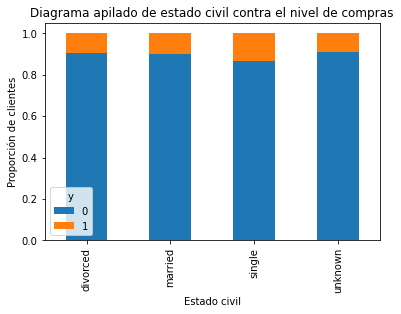

In [50]:
#Grafico para la variable marital
# Se puede inducir que la cantidad de clientes no es afectado por el estado civil
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

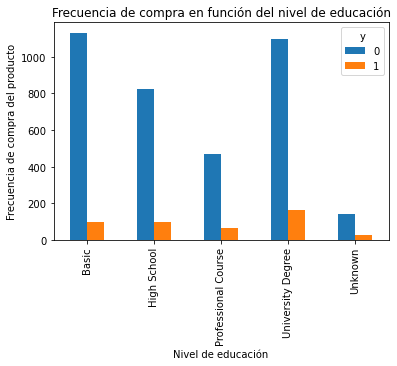

In [51]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

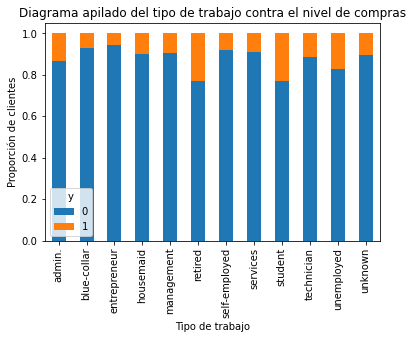

In [52]:
table=pd.crosstab(data.job, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado del tipo de trabajo contra el nivel de compras")
plt.xlabel("Tipo de trabajo")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

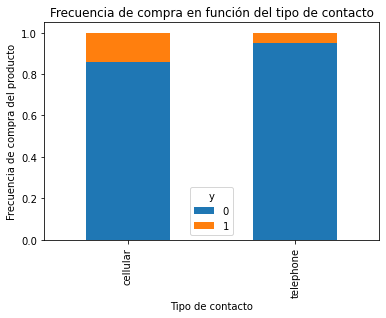

In [53]:
# Tipo de contacto, celular o por telefono
%matplotlib inline
table= pd.crosstab(data.contact, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del tipo de contacto")
plt.xlabel("Tipo de contacto")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

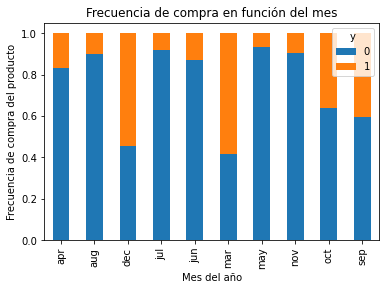

In [54]:
%matplotlib inline
table= pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

<AxesSubplot:xlabel='poutcome'>

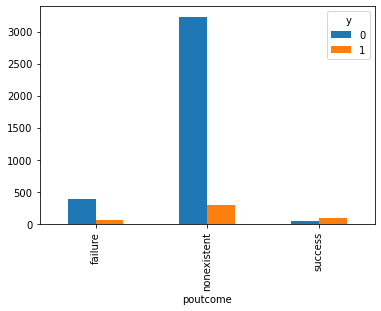

In [55]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

Text(0, 0.5, 'Frecuencia de compra del producto')

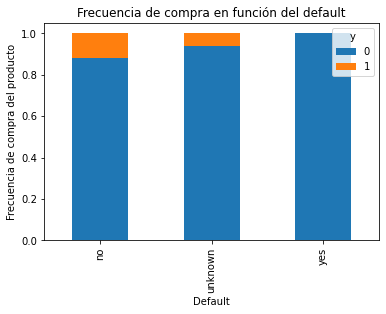

In [56]:
%matplotlib inline
table= pd.crosstab(data.default, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del default")
plt.xlabel("Default")
plt.ylabel("Frecuencia de compra del producto")

# Variables numéricas

In [58]:
# Calculando el gini individual caso continuo
####################################################
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Se calcula el gini para una variable

# Ingreso: 29.327%
logi=LogisticRegression() # Generando objeto
bgini=data.loc[:,['cons.price.idx']] # Generando base con variable
logi.fit(bgini,data.y) # Entrenamiento

2*roc_auc_score(data.y,logi.predict_proba(bgini)[:,1])-1 

0.1562945060897023

In [59]:
# Se crea una funcion para calcular el ini para todas las variables

def gini_in1(input_1,variable,target):
    logi=LogisticRegression() # Generando objeto
    bgini=input_1.loc[:,[variable]] # Generando base con variable
    logi.fit(bgini,input_1[target]) # Entrenamiento
    gini=2*roc_auc_score(input_1[target],logi.predict_proba(bgini)[:,1])-1 
    result = pd.DataFrame(columns=['Variable','Gini'])
    result.loc[len(result)]=[variable,gini] 
    return(result)

In [60]:
gini_in1(data,'cons.price.idx',"y")

,Variable,Gini
0,cons.price.idx,0.156295


### pd.factorize

Codifique el objeto como un tipo enumerado o una variable categórica.

Este método es útil para obtener una representación numérica de una matriz cuando todo lo que importa es identificar valores distintos. factorize está disponible como función de nivel superior pandas.factorize() y como método

In [61]:
var_cuanti_1=pd.DataFrame(data.dtypes, columns = ['Tipo_columna']).reset_index()
var_cuanti_1['Tipo_columna_2'] = pd.factorize(var_cuanti_1["Tipo_columna"])[0]
var_cuanti_1
# averiguar pd.factorize

,index,Tipo_columna,Tipo_columna_2
0,age,int64,0
1,job,object,1
2,marital,object,1
3,education,object,1
4,default,object,1
5,housing,object,1
6,loan,object,1
7,contact,object,1
8,month,object,1
9,day_of_week,object,1


In [62]:
var_cuanti_1=var_cuanti_1[var_cuanti_1['Tipo_columna_2'].isin([0,2])]
var_cuanti_1=var_cuanti_1["index"].tolist()
var_cuanti_1.pop(10)
var_cuanti_1

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [63]:
result_f3 = pd.DataFrame(columns=['Variable','Gini'])
for i in var_cuanti_1:
    A=gini_in1(data,i,"y")
    result_f3.loc[len(result_f3)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f3 = result_f3.sort_values('Gini',ascending=False)
result_f3

,Variable,Gini
1,duration,0.643265
8,euribor3m,0.491628
9,nr.employed,0.491032
5,emp.var.rate,0.412654
4,previous,0.243920
3,pdays,0.205669
6,cons.price.idx,0.156295
2,campaign,0.107061
7,cons.conf.idx,0.085779
0,age,0.042288


por lo general se selecciona los ginis mas altos 0.5 <, aunque en algunos casos se toman un gini con 0.4 <

# gini para variables categóricas

In [84]:
# Calculando el gini individual caso categórico
#####################################################
bgini=data.loc[:,['job']]
cat_dummies = pd.get_dummies(bgini['job'], prefix='job')

bgini = bgini.join(cat_dummies)
d_vars = bgini.columns.values.tolist()
to_keep = [v for v in d_vars if v not in var_cuali]
bgini=bgini[to_keep]

logi=LogisticRegression() # Generando objeto
logi.fit(bgini,data.y) # Entrenamiento
2*roc_auc_score(data.y,logi.predict_proba(bgini)[:,1])-1 

0.21526741737130872

In [85]:
def gini_in2(input_1,variable,target):
    base=input_1.loc[:,[variable]]
    cat_dummies = pd.get_dummies(base[variable], prefix=variable)
    base = base.join(cat_dummies)
    d_vars = base.columns.values.tolist()
    to_keep = [v for v in d_vars if v not in var_cuali]
    base=base[to_keep]
    logi=LogisticRegression() # Generando objeto
    logi.fit(base,input_1[target]) # Entrenamiento
    gini=2*roc_auc_score(input_1[target],logi.predict_proba(base)[:,1])-1 
    result = pd.DataFrame(columns=['Variable','Gini'])
    result.loc[len(result)]=[variable,gini] 
    return(result)

In [86]:
gini_in2(data,'job',"y")

,Variable,Gini
0,job,0.215267


In [87]:
var_cuali=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']

result_f2 = pd.DataFrame(columns=['Variable','Gini'])
for i in var_cuali:
    A=gini_in2(data,i,"y")
    result_f2.loc[len(result_f2)]=[A.loc[0].values[0],A.loc[0].values[1]]
    result_f2 = result_f2.sort_values('Gini',ascending=False)
result_f2

,Variable,Gini
6,month,0.308050
8,poutcome,0.252909
0,job,0.215267
5,contact,0.210711
2,education,0.127395
1,marital,0.074464
7,day_of_week,0.019760
4,loan,0.018898
3,housing,0.007432


In [88]:
#quedandonos con las variables finalistas
vf_continuas=result_f3[result_f3.Gini>0.05]["Variable"].tolist()
vf_categoricas=result_f2[result_f2.Gini>0.05]["Variable"].tolist()
vf_categoricas+vf_continuas

['month',
 'poutcome',
 'job',
 'contact',
 'education',
 'marital',
 'duration',
 'euribor3m',
 'nr.employed',
 'emp.var.rate',
 'previous',
 'pdays',
 'cons.price.idx',
 'campaign',
 'cons.conf.idx']

# Conversión de las variables categóricas a dummies

In [78]:
#Filtrado de data
data_model=data[vf_categoricas+vf_continuas]
data_model.head()

,month,poutcome,job,contact,education,marital,duration,euribor3m,nr.employed,emp.var.rate,previous,pdays,cons.price.idx,campaign,cons.conf.idx
0,may,nonexistent,blue-collar,cellular,Basic,married,487,1.313,5099.1,-1.8,0,999,92.893,2,-46.2
1,may,nonexistent,services,telephone,High School,single,346,4.855,5191.0,1.1,0,999,93.994,4,-36.4
2,jun,nonexistent,services,telephone,High School,married,227,4.962,5228.1,1.4,0,999,94.465,1,-41.8
3,jun,nonexistent,services,telephone,Basic,married,17,4.959,5228.1,1.4,0,999,94.465,3,-41.8
4,nov,nonexistent,admin.,cellular,University Degree,married,58,4.191,5195.8,-0.1,0,999,93.200,1,-42.0


In [79]:
for category in vf_categoricas:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data_model[category], prefix=category)#.iloc[:,1:] #AGREGANDO ESTO PARA ELIMINAR DUMMYS REDUNDANTES
    data_model = data_model.join(cat_dummies)
data_model

,month,poutcome,job,contact,education,marital,duration,euribor3m,nr.employed,emp.var.rate,...,contact_telephone,education_Basic,education_High School,education_Professional Course,education_University Degree,education_Unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,may,nonexistent,blue-collar,cellular,Basic,married,487,1.313,5099.1,-1.8,...,0,1,0,0,0,0,0,1,0,0
1,may,nonexistent,services,telephone,High School,single,346,4.855,5191.0,1.1,...,1,0,1,0,0,0,0,0,1,0
2,jun,nonexistent,services,telephone,High School,married,227,4.962,5228.1,1.4,...,1,0,1,0,0,0,0,1,0,0
3,jun,nonexistent,services,telephone,Basic,married,17,4.959,5228.1,1.4,...,1,1,0,0,0,0,0,1,0,0
4,nov,nonexistent,admin.,cellular,University Degree,married,58,4.191,5195.8,-0.1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,jul,nonexistent,admin.,cellular,Basic,married,53,4.958,5228.1,1.4,...,0,1,0,0,0,0,0,1,0,0
4115,jul,nonexistent,admin.,telephone,High School,married,219,4.959,5228.1,1.4,...,1,0,1,0,0,0,0,1,0,0
4116,may,failure,student,cellular,High School,single,64,1.354,5099.1,-1.8,...,0,0,1,0,0,0,0,0,1,0
4117,aug,nonexistent,admin.,cellular,High School,married,528,4.966,5228.1,1.4,...,0,0,1,0,0,0,0,1,0,0


In [80]:
data_vars=data_model.columns.values.tolist()
data_vars

['month',
 'poutcome',
 'job',
 'contact',
 'education',
 'marital',
 'duration',
 'euribor3m',
 'nr.employed',
 'emp.var.rate',
 'previous',
 'pdays',
 'cons.price.idx',
 'campaign',
 'cons.conf.idx',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'contact_cellular',
 'contact_telephone',
 'education_Basic',
 'education_High School',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown']

In [89]:
to_keep = [v for v in data_vars if v not in vf_categoricas]

In [90]:
X=data_model[to_keep]
X.head()

,duration,euribor3m,nr.employed,emp.var.rate,previous,pdays,cons.price.idx,campaign,cons.conf.idx,month_apr,...,contact_telephone,education_Basic,education_High School,education_Professional Course,education_University Degree,education_Unknown,marital_divorced,marital_married,marital_single,marital_unknown
0,487,1.313,5099.1,-1.8,0,999,92.893,2,-46.2,0,...,0,1,0,0,0,0,0,1,0,0
1,346,4.855,5191.0,1.1,0,999,93.994,4,-36.4,0,...,1,0,1,0,0,0,0,0,1,0
2,227,4.962,5228.1,1.4,0,999,94.465,1,-41.8,0,...,1,0,1,0,0,0,0,1,0,0
3,17,4.959,5228.1,1.4,0,999,94.465,3,-41.8,0,...,1,1,0,0,0,0,0,1,0,0
4,58,4.191,5195.8,-0.1,0,999,93.200,1,-42.0,0,...,0,0,0,0,1,0,0,1,0,0


In [91]:
Y = data['y']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# Selección de rasgos para el modelo

In [104]:
# 8 primeras variables
n = 8

In [105]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [106]:
lr = LogisticRegression()

In [107]:
import warnings
warnings.filterwarnings("ignore")

In [114]:
rfe = RFE(lr, n)
rfe = rfe.fit(X,Y)

In [115]:
print(rfe.support_)

[False  True False False  True False False False False False False  True
 False  True  True  True False False False  True False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False]


In [116]:
print(rfe.ranking_)

[35  1 32 18  1 37 24 17 23 33 22  1  2  1  1  1 11 31 29  1 30  1  7 15
 12 34 14  3 13 20  5  6  4 36  8 10 26 16 21 28  9 19 25 27 38]


In [117]:
z=zip(data_vars,rfe.support_, rfe.ranking_)

In [118]:
list(z)

[('month', False, 35),
 ('poutcome', True, 1),
 ('job', False, 32),
 ('contact', False, 18),
 ('education', True, 1),
 ('marital', False, 37),
 ('duration', False, 24),
 ('euribor3m', False, 17),
 ('nr.employed', False, 23),
 ('emp.var.rate', False, 33),
 ('previous', False, 22),
 ('pdays', True, 1),
 ('cons.price.idx', False, 2),
 ('campaign', True, 1),
 ('cons.conf.idx', True, 1),
 ('month_apr', True, 1),
 ('month_aug', False, 11),
 ('month_dec', False, 31),
 ('month_jul', False, 29),
 ('month_jun', True, 1),
 ('month_mar', False, 30),
 ('month_may', True, 1),
 ('month_nov', False, 7),
 ('month_oct', False, 15),
 ('month_sep', False, 12),
 ('poutcome_failure', False, 34),
 ('poutcome_nonexistent', False, 14),
 ('poutcome_success', False, 3),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 20),
 ('job_entrepreneur', False, 5),
 ('job_housemaid', False, 6),
 ('job_management', False, 4),
 ('job_retired', False, 36),
 ('job_self-employed', False, 8),
 ('job_services', False, 10)

# Implementación del modelo en Python con scikit-learn

In [119]:
from sklearn import linear_model

In [120]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [121]:
#accuracy
logit_model.score(X,Y)

0.9162418062636563

In [122]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,duration,[0.004985990288770104]
1,euribor3m,[-0.2156623867977659]
2,nr.employed,[-0.008841208316152167]
3,emp.var.rate,[-0.1212130047902034]
4,previous,[-0.023961706853309055]
5,pdays,[-0.001407044507767097]
6,cons.price.idx,[0.48947170815703805]
7,campaign,[-0.0459098269718797]
8,cons.conf.idx,[0.05637930289032067]
9,month_apr,[-0.012032449495317607]


# Validación del modelo logístico

In [123]:
def Gini(y_true,y_pred,signo='+'):
    from sklearn.metrics import roc_auc_score
    return 2*roc_auc_score(y_true, y_pred)-1

In [126]:
probs = logit_model.predict_proba(X)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])

In [127]:
Y2=Y.reset_index()
Y2['Probs']=m

In [128]:
1*Gini(Y2["y"],Y2["Probs"])

0.8664968433168025

In [129]:
threshold = 0.5
Y2["prediction"]=np.where(probs>threshold, 1, 0)

In [130]:
confusion_matrix = pd.crosstab(Y2.prediction, Y2.y)
confusion_matrix

y,0,1
prediction,,
0,3575,252
1,93,199


In [131]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]
final=(TP+TN)/(TN+TP+FN+FP)
final

0.9162418062636563

# Validación cruzada ---> k fold cross validation

In [141]:
from sklearn.model_selection import cross_val_score
# En train (Tasa de aciertos)
cv_train_ta=cross_val_score(logit_model,X,Y,cv=10) # cuantas muestras
np.mean(cv_train_ta)

0.9133282545531853

In [134]:
# Separando en train y test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.1,
                                           random_state=8)

In [135]:
# Entrenando modelo
logit_model.fit(Xtrain,ytrain)

LogisticRegression()

In [136]:
#accuracy
logit_model.score(Xtrain,ytrain)

0.9169139465875371

In [137]:
#accuracy
logit_model.score(Xtest,ytest)

0.9077669902912622

In [138]:
probs = logit_model.predict_proba(Xtrain)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytrain.reset_index()
Y2['Probs']=m

1*Gini(Y2["y"],Y2["Probs"])

0.8680953877881397

In [139]:
probs = logit_model.predict_proba(Xtest)[:,1:]

m=pd.DataFrame(probs,columns = ['Probs'])

Y2=ytest.reset_index()
Y2['Probs']=m

1*Gini(Y2["y"],Y2["Probs"])

0.8645083302675147